![example](images/director_shot.jpeg)

# Project Title

**Authors:** Muhammad Sami Javed
***

## Overview

Microsoft wants to move into the movie industry and has no idea on where to start. i have been asked to analyze the given data and draw actionable insights for Microsoft that will provide them an advantage  as they venture into this industry. by using descriptive statistics and visualizations on the given data, I have been able to establish trends in the data. For example, movies released in July, November and June respectively had the highest returns on investment(ROI).

## Business Problem

Microsoft are clueless about movie production and they want to create a new movie studio.

For the new movie studio to be profitable, some of the factors Microsoft needs to be aware of are:

* Which studio should Microsoft look to take over?
* Genres. What genres are most common and profitable?
* What is the ideal period for them to release movies and be profitable?

## Data Understanding

I have used data from 4 different sources to have an extensive understanding of the movie industry.

* Box Office Mojo(bom.movie_gross). Box Office Mojo is an American website that tracks box-office revenue in a systematic, algorithmic way.This dataset contains values for movie title, domestic and worlwide gross, studio name, and year of release.
* IMDB.IMDb is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.This dataset contains values for movie name, production budget, domestic and worldwide gross, genre, runtime, release year and average rating.
* The Numbers.The Numbers provides detailed movie financial analysis, including box office, DVD and Blu-ray sales reports, and release schedules.This dataset contains values for movie name, release date, production budget, domestic and international gross.
* The Movie DB.The Movie Database is a popular database for movies and TV shows.  This dataset contains values for genre ids, original language, original title, popularity, release date, title, vote average, and vote count.
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [272]:
gross_df = pd.read_csv('C:/Users/Sami/Documents/Flatiron/dsc-project-template/zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('C:/Users/Sami/Documents/Flatiron/dsc-project-template/zippedData/rt.movie_info.tsv.gz',sep='\t')
reviews_df = pd.read_csv('C:/Users/Sami/Documents/Flatiron/dsc-project-template/zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')
tmdb_df = pd.read_csv('C:/Users/Sami/Documents/Flatiron/dsc-project-template/zippedData/tmdb.movies.csv.gz')
budget_df = pd.read_csv('C:/Users/Sami/Documents/Flatiron/dsc-project-template/zippedData/tn.movie_budgets.csv.gz')

# Inspecting the dataframes
After reading into our data, we should then try to understand the structure of our data by inspecting its:

- Shape
- Volume
- Feature types
- Missing Values

In [4]:
gross_df.info()
gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [439]:
movie_info.info()
movie_info.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1552 non-null   int64 
 1   synopsis      1495 non-null   object
 2   rating        1552 non-null   object
 3   genre         1552 non-null   object
 4   director      1360 non-null   object
 5   writer        1110 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1526 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 157.6+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action and Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Musical and Performing Arts]",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery and Suspense]",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [296]:
reviews_df.info()
reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [58]:
tmdb_df.info()
tmdb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
 10  release_year       26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 2.2+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter And The Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How To Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


In [10]:
budget_df.info()
budget_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation

* Describe and justify the process for preparing the data for analysis.

* For data preparation I had to create new Dataframs by dropping coloums from the given dataframes and joining them to other dataframs. for eg. I had to join budget_df and gross_df to get the desired results. 

* Empty values (NaN, NaT) values were dropped using .dropna() functions.

* Format and datatypes were changed as well in order to get the desired results.

* The choices were made based on the probelms that were posed.

In [383]:
# Change the year data to match the IMDB format of only the year number using .to_datetime().
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])
budget_df['release_year'] = budget_df['release_date'].dt.year
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_year'] = tmdb_df['release_date'].dt.year

# Create a month datetime column of the release dates sing .to_datetime().
budget_df['month_dt'] = pd.to_datetime(budget_df['release_date']).dt.month

# Create a month string column of the release dates
budget_df['month'] = budget_df['release_date'].dt.month
budget_df = budget_df.drop('release_date', 1)

In [373]:
# Converting the columns specified below to integer data types.
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
budget_df[cols] = budget_df[cols].replace('[\$,]', '', regex=True).astype('int64')
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [27]:
# Converting all title data to strings and title case it.
budget_df['movie'] = budget_df['movie'].str.title()
gross_df['title'] = gross_df['title'].str.title()
tmdb_df['title'] = tmdb_df['title'].str.title()

In [374]:
# Creating profit margin columns
budget_df['dom_profit_margin'] = (budget_df['domestic_gross'] - budget_df['production_budget']) / budget_df['domestic_gross'] * 100 
budget_df['ww_profit_margin'] = (budget_df['worldwide_gross'] - budget_df['production_budget']) / budget_df['worldwide_gross'] * 100

In [390]:
#Adding column 'worldwide_profit' which is the difference between 'worldwide_gross' and 'production_budget'
budget_df['worldwide_profit'] = (budget_df['worldwide_gross'] - budget_df['production_budget'])

# Use the newly created column above to calculate ROI in percentage form 
budget_df['ROI'] = (budget_df['worldwide_profit']  / budget_df['production_budget']) * 100

budget_df

,id,movie,production_budget,domestic_gross,worldwide_gross,dom_profit_margin,ww_profit_margin,worldwide_profit,ROI,release_year,month_dt,month
0,1,Avatar,425000000,760507625,2776345279,44.116274,84.692106,2351345279,553.257713,2009,12,12
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-70.328300,60.733080,635063875,154.667286,2011,5,5
2,3,Dark Phoenix,350000000,42762350,149762350,-718.477001,-133.703598,-200237650,-57.210757,2019,6,6
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,27.974777,76.436443,1072413963,324.384139,2015,5,5
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,48.885921,75.925058,999721747,315.369636,2017,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5776,77,The Mongol King,7000,900,900,-677.777778,-677.777778,-6100,-87.142857,2004,12,12
5777,78,Red 11,7000,0,0,-inf,-inf,-7000,-100.000000,2018,12,12
5779,80,Return to the Land of Wonders,5000,1338,1338,-273.692078,-273.692078,-3662,-73.240000,2005,7,7
5780,81,A Plague So Pleasant,1400,0,0,-inf,-inf,-1400,-100.000000,2015,9,9


In [391]:
# limit the budget_df to movies released after 2000
budget_df = budget_df[budget_df['release_year'] > 2000]

In [398]:
# Creating a new data frame grouped by months and their median values.
month_df = budget_df.groupby('month').median()

month_df = month_df.reset_index()

month_df = month_df.sort_values('month_dt')

month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

month_df['month_name'] = month_dict.values() 

month_df

,month,id,production_budget,domestic_gross,worldwide_gross,dom_profit_margin,ww_profit_margin,worldwide_profit,ROI,release_year,month_dt,month_name
0,1,49.0,18000000.0,17469107.0,35260470.0,-18.194007,35.872701,11131779.0,55.970313,2010.5,1.0,Jan
1,2,48.0,20000000.0,19192510.0,39049922.0,-32.098180,42.393282,13874967.0,73.590865,2010.0,2.0,Feb
2,3,50.5,18000000.0,16127344.5,25802739.5,-33.852768,31.264828,7875084.0,45.486464,2010.0,3.0,Mar
3,4,49.0,17250000.0,11453108.0,21673225.5,-54.808462,26.296037,4392610.5,35.679779,2010.0,4.0,Apr
4,5,52.0,20000000.0,18882880.0,38158601.0,-14.924275,46.087290,15796145.0,85.485017,2010.0,5.0,May
5,6,47.5,21750000.0,21457839.5,42609137.0,-14.466283,46.657734,11152619.0,87.486787,2010.0,6.0,Jun
6,7,52.5,20000000.0,27397912.5,50397206.5,-10.912285,51.447233,20734161.5,105.967766,2010.0,7.0,Jul
7,8,51.0,20000000.0,16521410.0,30138912.0,-18.602702,38.638099,8153415.0,62.967571,2009.0,8.0,Aug
8,9,47.0,16250000.0,10300039.5,21702186.0,-79.261245,14.236461,758125.0,16.648966,2010.0,9.0,Sep
9,10,50.0,13000000.0,8050767.0,15486441.5,-69.697121,25.505637,2413808.5,34.247581,2009.0,10.0,Oct


In [566]:
movie_info["genre_list"] = movie_info["genre"].map(lambda x: x.split(" and "))
# use explode to convert list elements to rows
movie_info = movie_info.explode('genre_list')
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Action
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Action
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Adventure
1,1,"This gritty, fast-paced, and innovative police...",R,Classics,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Classics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,2000,"Suspended from the force, Paris cop Hubert is ...",R,Drama,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,Drama
3572,2000,"Suspended from the force, Paris cop Hubert is ...",R,Mystery and Suspense,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,Mystery
3572,2000,"Suspended from the force, Paris cop Hubert is ...",R,Mystery and Suspense,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,Suspense
3572,2000,"Suspended from the force, Paris cop Hubert is ...",R,Mystery and Suspense,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,Mystery


## Merging Datasets

In [399]:
# Creating a new dataframe with studio and box office data 
studios_df = gross_df[['title', 'studio', 'year']].merge(budget_df, left_on=['title', 'year'], right_on=['movie', 'release_year'])

In [400]:
# Group the data in studios_df by studio
avg_studio = studios_df.groupby('studio').mean().reset_index()
avg_studio = avg_studio[avg_studio['dom_profit_margin'] > 0]

## Data visualisation

<ipython-input-401-4d09bc916df8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(labels=avg_studio['studio'], fontsize=30)
<ipython-input-401-4d09bc916df8>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=avg_studio['studio'], fontsize=30);


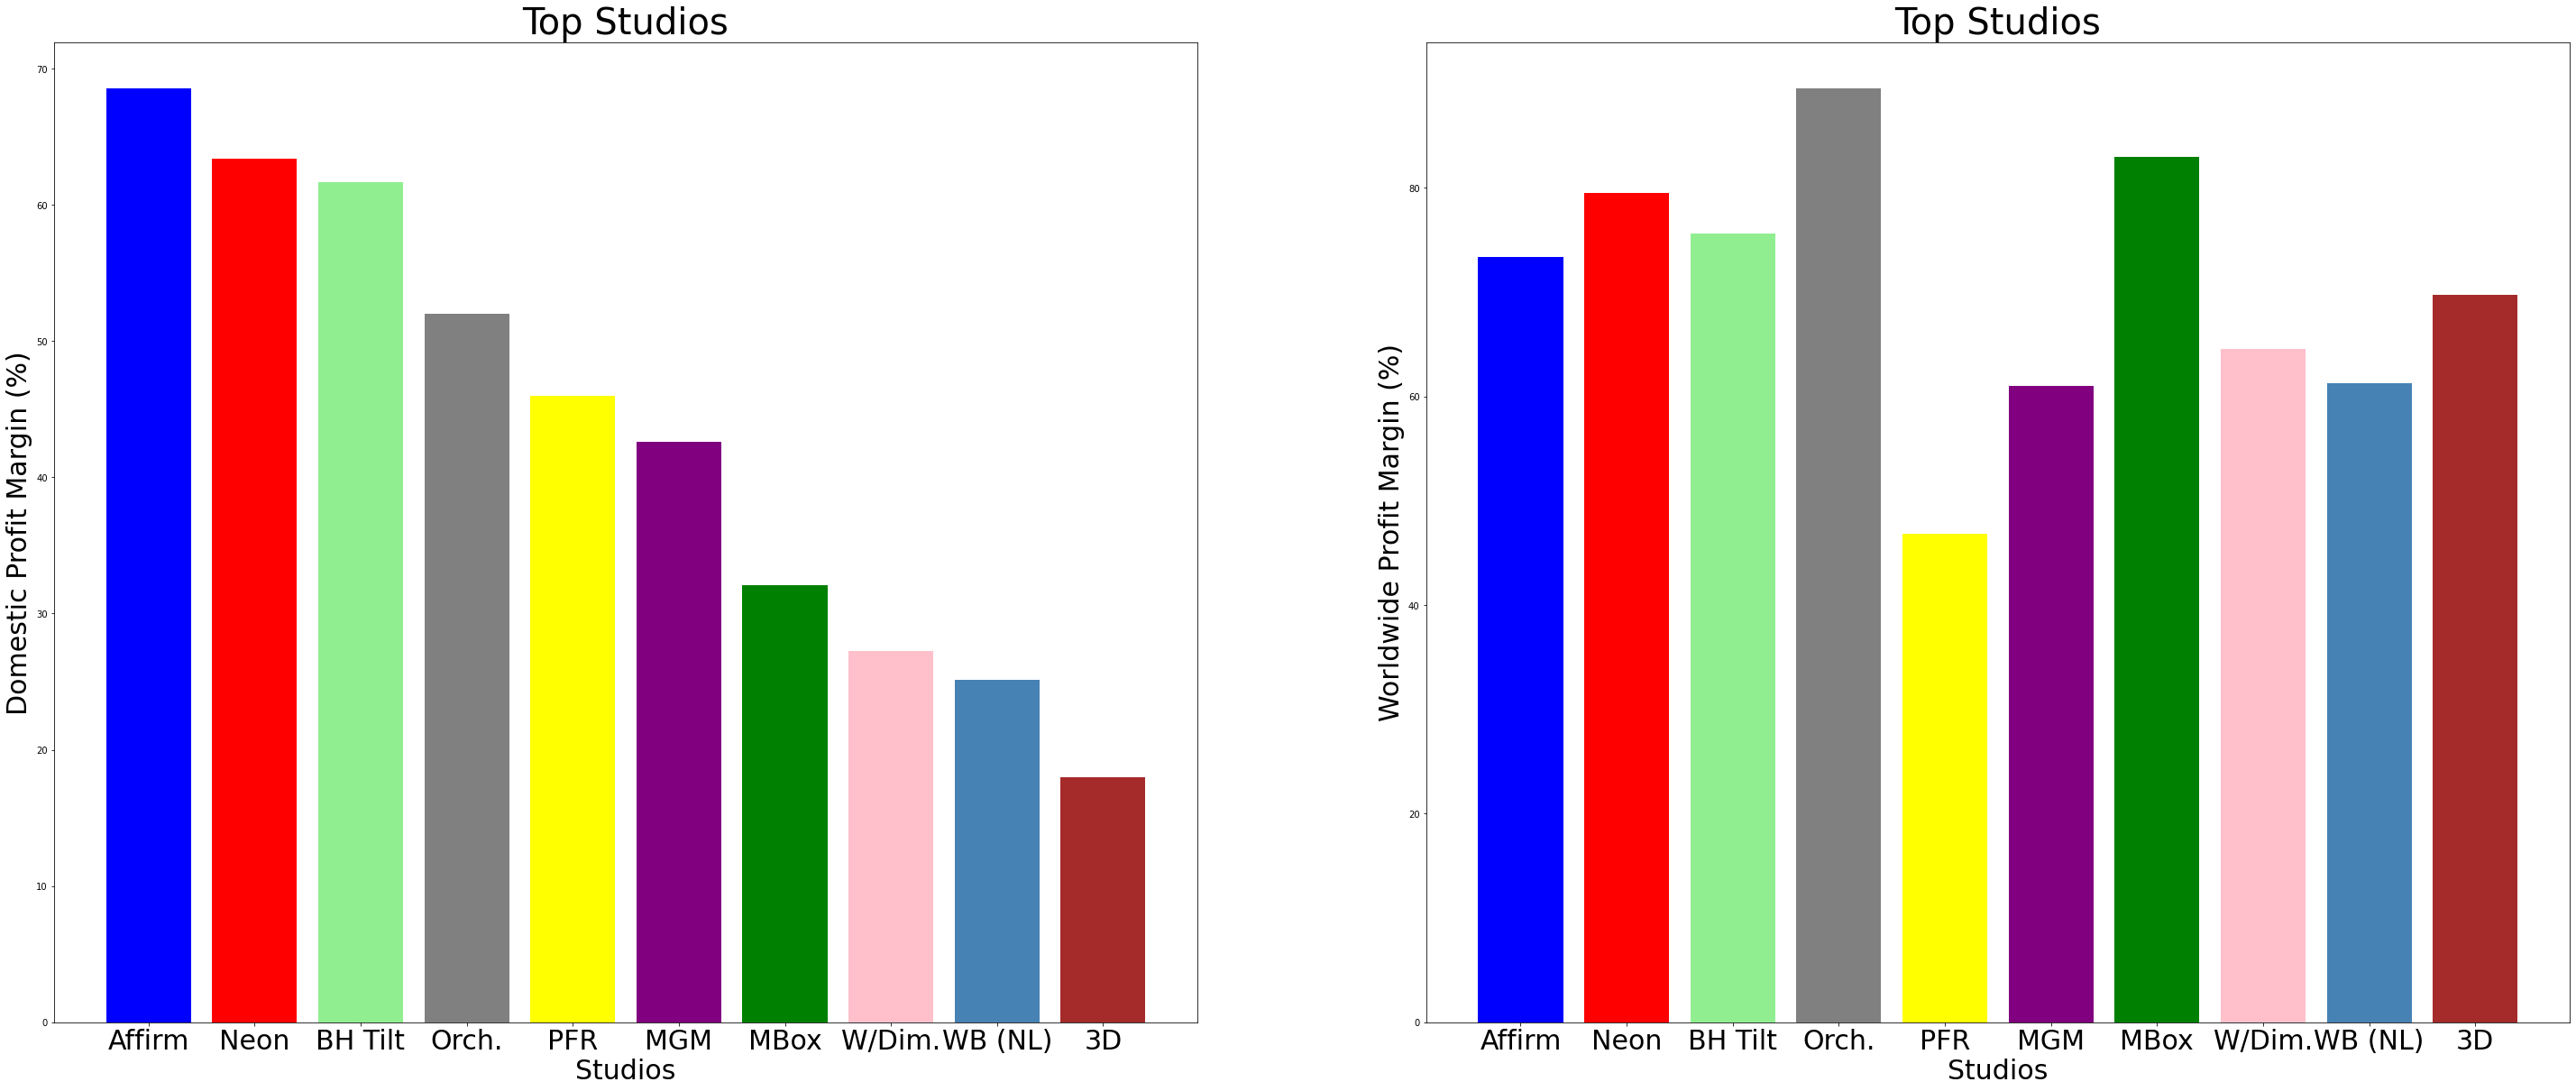

In [401]:
avg_studio = avg_studio.sort_values('dom_profit_margin', ascending=False).iloc[:10]

fig, axs= plt.subplots(figsize=(50,20), ncols=2)

axs[0].bar(avg_studio['studio'], avg_studio['dom_profit_margin'],
          color=['blue', 'red', 'lightgreen', 'orange', 'green', 'purple', 'green', 'pink', 'steelblue', 'brown'])
axs[1].bar(avg_studio['studio'], avg_studio['ww_profit_margin'],
          color=['blue', 'red', 'lightgreen', 'grey', 'yellow', 'purple', 'green', 'pink', 'steelblue', 'brown'])

axs[0].set_title('Top Studios', fontsize=40)
axs[0].set_xlabel('Studios', fontsize=30)
axs[0].set_ylabel('Domestic Profit Margin (%)', fontsize=30)
axs[0].set_xticklabels(labels=avg_studio['studio'], fontsize=30)

axs[1].set_title('Top Studios', fontsize=40)
axs[1].set_xlabel('Studios', fontsize=30)
axs[1].set_ylabel('Worldwide Profit Margin (%)', fontsize=30)
axs[1].set_xticklabels(labels=avg_studio['studio'], fontsize=30);

plt.savefig('./images/Top 10 Grossing Studios.png', dpi = 150)

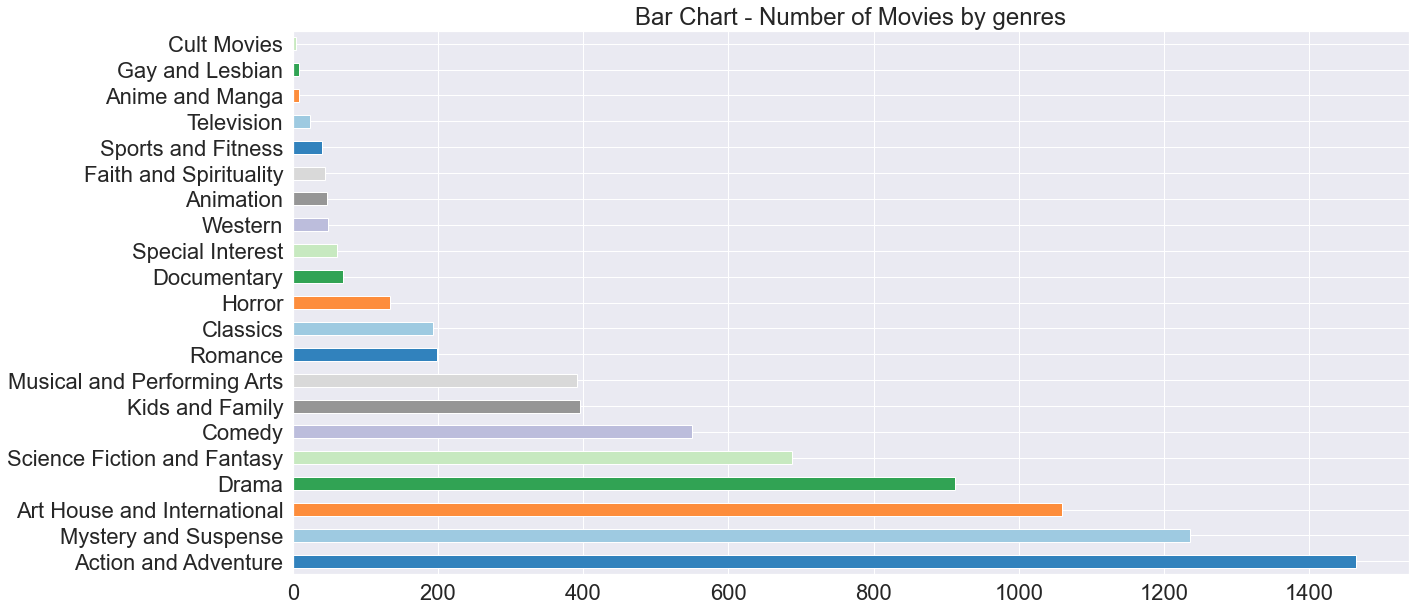

In [567]:
# Distribution of the movie genres (Bar chart)
cmap = plt.get_cmap('tab20c')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

ax = movie_info['genre'].value_counts().head(40).plot(kind='barh', figsize=(20,10), color=colors)

plt.title('Bar Chart - Number of Movies by genres')

plt.savefig('./images/no of titles.png', dpi = 150)

In [543]:
from sklearn.feature_extraction.text import CountVectorizer
temp = movie_info.genre_list.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)

array(['action', 'adventure', 'animation', 'anime', 'art', 'arts',
       'classics', 'comedy', 'cult', 'documentary', 'drama', 'faith',
       'family', 'fantasy', 'fiction', 'fitness', 'gay', 'horror',
       'house', 'interest', 'international', 'kids', 'lesbian', 'manga',
       'movies', 'musical', 'mystery', 'performing', 'romance', 'science',
       'special', 'spirituality', 'sports', 'suspense', 'television',
       'western'], dtype='<U13')

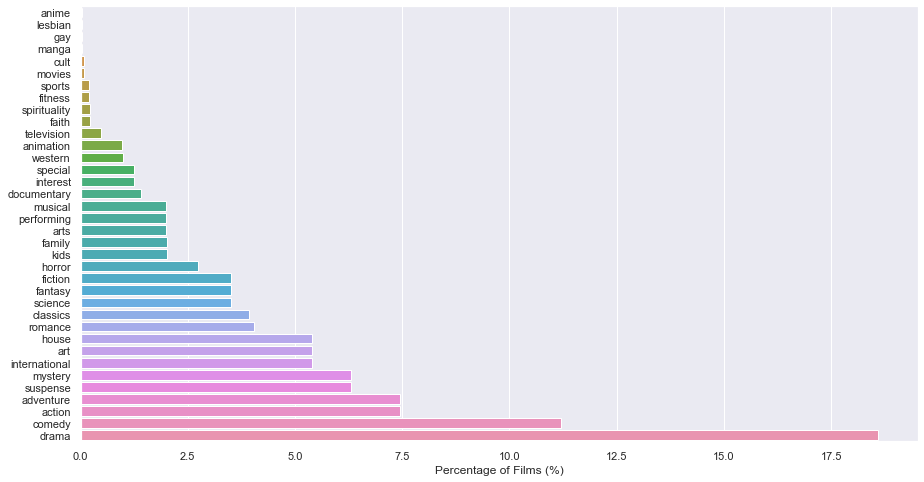

<Figure size 432x288 with 0 Axes>

In [573]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values()/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
sns.set(font_scale = 2)
plt.show()

plt.savefig('./images/genres with most percentage.png', dpi = 100)

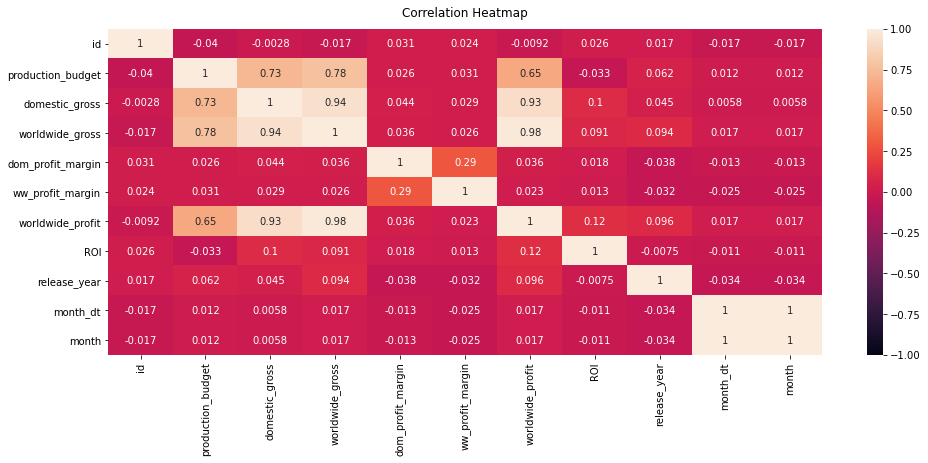

In [416]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(budget_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the heatmap, there is little or no correlation between production budget and ROI. This means that high production budgets does not necessarily guarantee higher returns on the movies

In [549]:
# Graphing Parameters
month = month_df['month_name']
profit_amount = month_df['worldwide_profit']
ROI = month_df['ROI']
wwgross = month_df['worldwide_gross']

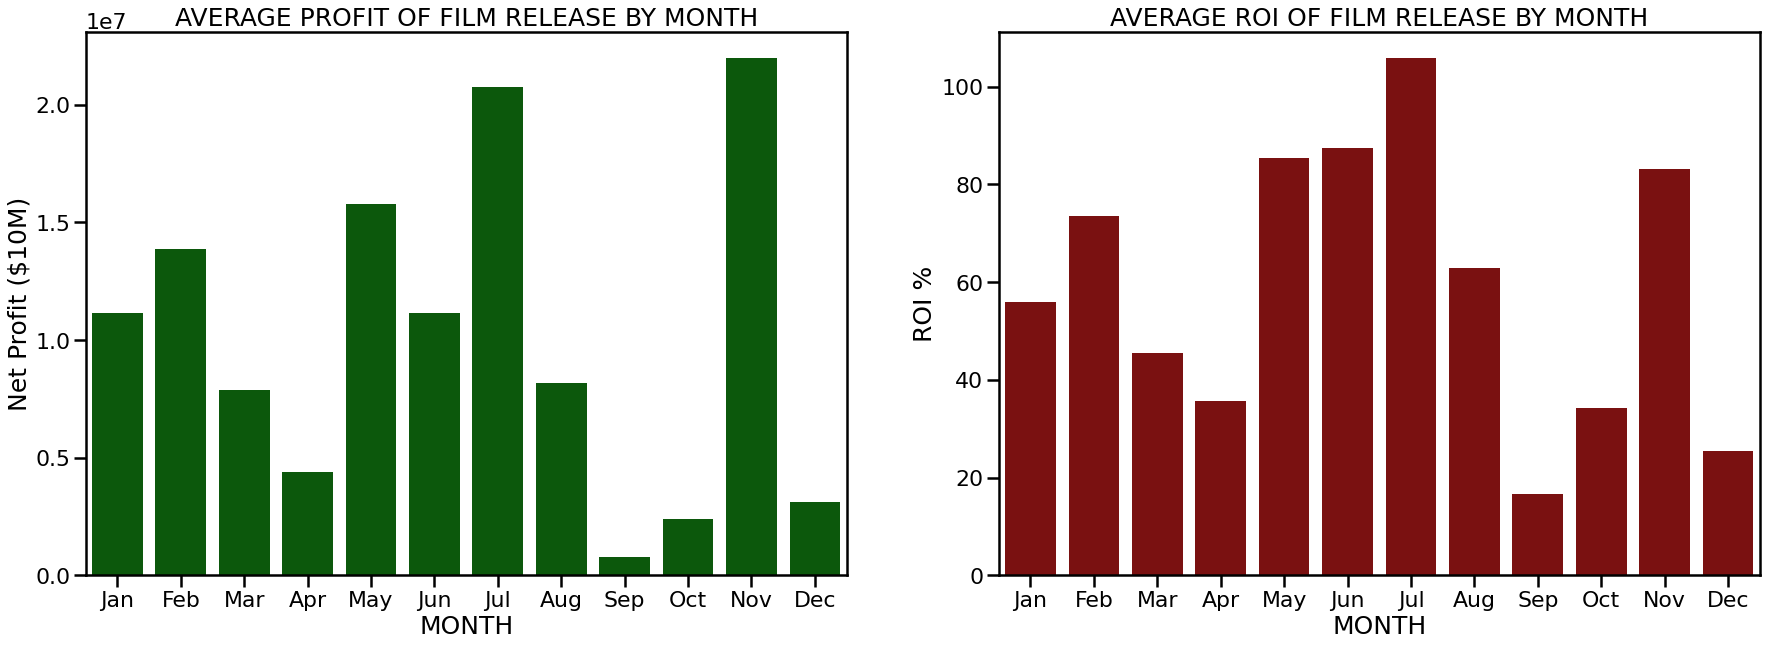

In [552]:
fig, axs = plt.subplots(figsize=(30,10), ncols=2)

sns.barplot(x=month, y=profit_amount, ax=axs[0], color='darkgreen')
sns.barplot(x=month, y=ROI, ax=axs[1], color='darkred')
sns.set_context('poster')

axs[0].set_xlabel('MONTH', fontsize=25)
axs[0].set_ylabel('Net Profit ($10M)', fontsize=25)
axs[0].set_title(label='AVERAGE PROFIT OF FILM RELEASE BY MONTH', fontsize=25)

axs[1].set_xlabel('MONTH', fontsize=25)
axs[1].set_ylabel('ROI %', fontsize=25)
axs[1].set_title(label='AVERAGE ROI OF FILM RELEASE BY MONTH', fontsize=25);

plt.savefig('./images/Average ROI of film release by month.png', dpi = 150)

## Data Modeling

Data was cleaned to make it useable and understandable so that it can be worked on
My initial thought process was to wok on the rumtime of the movies as well but the I dropped the idea as I didnt think it was something that would affect the descision making. 

## Evaluation

I think my evaluation would be helpful for Microsoft as it will make the decision easier for them if they want to venture in in to movies business or not. 

## Conclusions
* Movie release dates should be kept within the months of May, June, July and November.
* Microsoft could consider acquiring either of the top grossing studios: BH Tilt,Neon or Orchard film studios.
* It would be ideal if Microsoft produced movies of the most common genres,i.e,documentaries, drama and comedy.